In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("crop_yield_dataset.csv")

In [4]:
df.head()

,region,rainfall_mm,avg_temperature_c,humidity_percent,soil_ph,fertilizer_kg_per_hectare,area_hectare,crop_yield_tons
0,Dakshina Kannada,2182.471028,28.848458,88.889463,4.649314,269.289789,0.673813,36.572301
1,Udupi,2031.774756,25.807972,74.780682,7.399766,276.793110,0.990128,38.923415
2,Dakshina Kannada,1451.769476,34.396475,62.818624,5.372577,144.593080,2.446234,31.750666
3,Dakshina Kannada,3046.886679,21.722634,84.465671,5.493781,107.907681,4.757993,31.504075
4,Dakshina Kannada,2563.509394,27.993559,71.747125,5.291858,97.915263,0.836969,29.479222


In [5]:
df.shape

(20000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     20000 non-null  object 
 1   rainfall_mm                20000 non-null  float64
 2   avg_temperature_c          20000 non-null  float64
 3   humidity_percent           20000 non-null  float64
 4   soil_ph                    20000 non-null  float64
 5   fertilizer_kg_per_hectare  20000 non-null  float64
 6   area_hectare               20000 non-null  float64
 7   crop_yield_tons            20000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


In [7]:
df.describe()

,rainfall_mm,avg_temperature_c,humidity_percent,soil_ph,fertilizer_kg_per_hectare,area_hectare,crop_yield_tons
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2658.473502,26.462406,75.098654,6.250469,174.454426,2.740451,35.287301
std,1065.742149,4.915272,11.519736,1.010866,72.001735,1.300936,4.954814
min,800.178058,18.000094,55.000337,4.500451,50.007337,0.500124,19.008817
25%,1739.244196,22.179984,65.219136,5.368824,111.438985,1.615216,31.880571
50%,2664.421495,26.443229,75.212596,6.257832,175.047772,2.731860,35.277245
75%,3578.636814,30.731519,85.110506,7.133725,236.434569,3.863107,38.719388
max,4499.721859,34.999527,94.997588,7.999972,299.993994,4.999646,51.765907


In [8]:
df.isnull().sum()

region                       0
rainfall_mm                  0
avg_temperature_c            0
humidity_percent             0
soil_ph                      0
fertilizer_kg_per_hectare    0
area_hectare                 0
crop_yield_tons              0
dtype: int64

In [9]:
df['region'].unique()

array(['Dakshina Kannada', 'Udupi'], dtype=object)

In [10]:
df["region"].replace({"Dakshina Kannada": 1, "Udupi": 2}, inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23692\2629770390.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["region"].replace({"Dakshina Kannada": 1, "Udupi": 2}, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23692\2629770390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["

In [11]:
df.head()

,region,rainfall_mm,avg_temperature_c,humidity_percent,soil_ph,fertilizer_kg_per_hectare,area_hectare,crop_yield_tons
0,1,2182.471028,28.848458,88.889463,4.649314,269.289789,0.673813,36.572301
1,2,2031.774756,25.807972,74.780682,7.399766,276.793110,0.990128,38.923415
2,1,1451.769476,34.396475,62.818624,5.372577,144.593080,2.446234,31.750666
3,1,3046.886679,21.722634,84.465671,5.493781,107.907681,4.757993,31.504075
4,1,2563.509394,27.993559,71.747125,5.291858,97.915263,0.836969,29.479222


In [12]:
X = df.drop("crop_yield_tons", axis=1)
y = df["crop_yield_tons"]


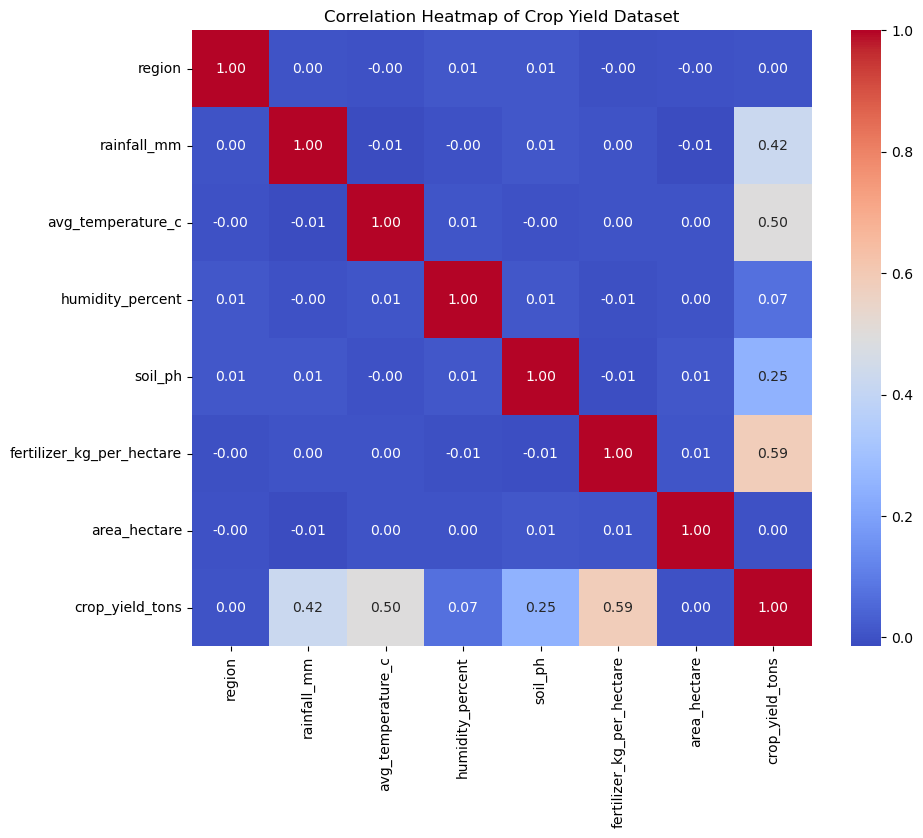

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap of Crop Yield Dataset")
plt.show()


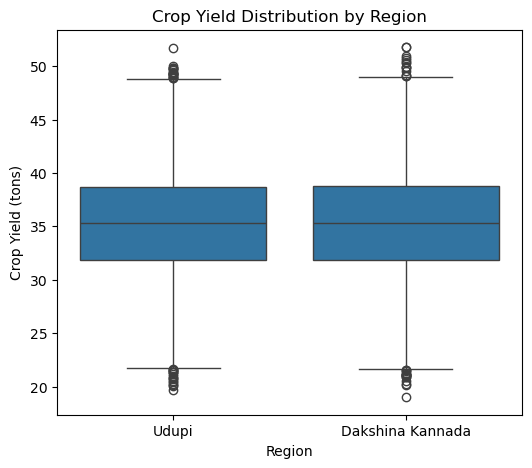

In [38]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    x="region",
    y="crop_yield_tons",
    data=df
)

plt.xticks(
    ticks=[0, 1],
    labels=["Udupi", "Dakshina Kannada"]
)

plt.xlabel("Region")
plt.ylabel("Crop Yield (tons)")
plt.title("Crop Yield Distribution by Region")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [19]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 1.5678542634674113
RMSE: 1.9762494826933248
R²: 0.8410301879226562


In [20]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeff_df.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
4,soil_ph,1.211323
2,avg_temperature_c,0.503727
5,fertilizer_kg_per_hectare,0.040156
3,humidity_percent,0.029373
0,region,0.028647
1,rainfall_mm,0.001985
6,area_hectare,-0.005588


In [21]:
import matplotlib.pyplot as plt


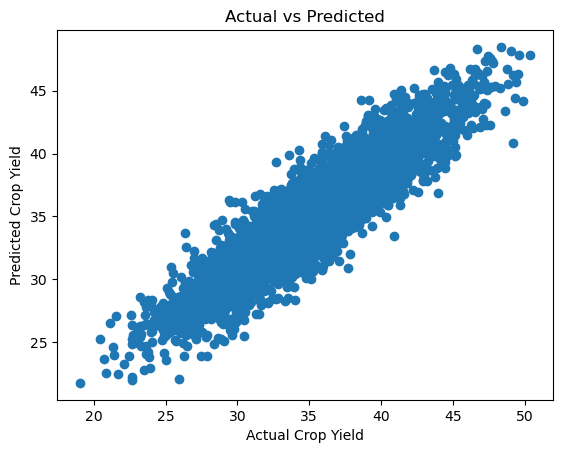

In [41]:
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted")
plt.show()


<Axes: xlabel='crop_yield_tons', ylabel='Count'>

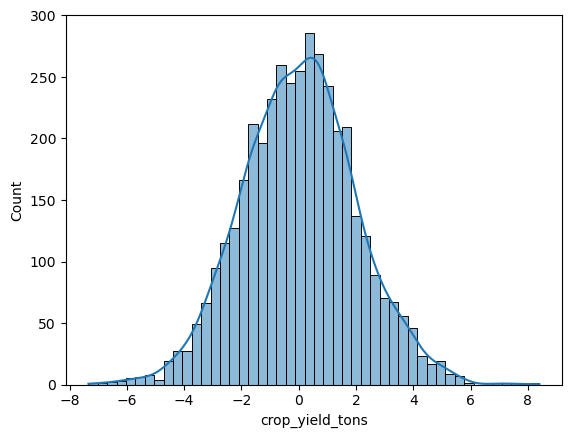

In [43]:
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
#Normality of Residuals
#    Residuals (errors) should be normally distributed.


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   region                     20000 non-null  int64  
 1   rainfall_mm                20000 non-null  float64
 2   avg_temperature_c          20000 non-null  float64
 3   humidity_percent           20000 non-null  float64
 4   soil_ph                    20000 non-null  float64
 5   fertilizer_kg_per_hectare  20000 non-null  float64
 6   area_hectare               20000 non-null  float64
 7   crop_yield_tons            20000 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [32]:
new_data = pd.DataFrame({
    "region" : [1],
    "rainfall_mm": [3000],
    "avg_temperature_c": [28],
    "humidity_percent": [85],
    "soil_ph": [6.5],
    "fertilizer_kg_per_hectare": [150],
    "area_hectare": [2]
})

prediction = model.predict(new_data)
print("Predicted Crop Yield(in tons):", prediction[0])


Predicted Crop Yield(in tons): 36.335416067812325


In [36]:
new_data2 = pd.DataFrame({
    "region": [2],          # 0 = Udupi
    "rainfall_mm": [1800],
    "avg_temperature_c": [30],
    "humidity_percent": [75],
    "soil_ph": [5.8],
    "fertilizer_kg_per_hectare": [100],
    "area_hectare": [1.5]
})

new_data2 = new_data2[X.columns]  # ensure correct order

prediction2 = model.predict(new_data2)
print("Predicted Crop Yield(in tons):", prediction2[0])


Predicted Crop Yield(in tons): 31.84290955387456
